# Apriori Algorithm

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [2]:
path = os.getcwd()

In [3]:
store_data = pd.read_csv(path + '/store_data.csv', header = None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tidy data

In [4]:
records = []

for i in range(0, store_data.shape[0]):
    
    tmp = []
    for j in range(0, store_data.shape[1]):
        if str(store_data.values[i,j]) != 'nan':
            tmp.append([str(store_data.values[i,j])])
        else:
            break
            
    records.append([str(tmp[k][0]) for k in range(0, len(tmp))])
    tmp = []
    
print('First transaction:', records[0])

First transaction: ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In [7]:
store_data.shape

(7501, 20)

## Apply algorithm

In [12]:
records[50]

['spaghetti', 'chocolate', 'brownies', 'white wine', 'green tea']

In [8]:
association_rule = apriori(records, min_support = 0.008, min_confidence = 0.2, min_lift = 3)
association_results = list(association_rule)
association_results[0]

RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)])

## Show result

In [6]:
count = 0
for item in association_results:
    #[2][0][0]=>item base   
    for item_num in range(0,len(item[2])):
        if item[2][item_num][0] == frozenset():
            continue
        else:
            pairBase = item[2][item_num][0] 
            items = [x for x in pairBase]
            r="Rule: ("
            for x in range(0,len(items)):
                if x==0 :
                    r=r+items[x]
                else:
                    r=r+", "+items[x]
            r=r+") -> "
            #[2][0][1]=>item add  
            pairAdd = item[2][item_num][1]
            items = [x for x in pairAdd]
            
            for x in range(0, len(items)):
                if x==0 :
                    r=r+"("+items[x]
                else:
                    r=r+", "+items[x]
            r=r+")"

            #print rule
            print(r)
            #[0] => all items in the rule
            print("Length: "+str(len(item[0])))
            #[1] => support
            print("Support: " + str(item[1]))
            #[2][0][2] => confidence
            print("Confidence: " + str(item[2][item_num][2]))
            #[2][0][3] => lift
            print("Lift: " + str(item[2][item_num][3]))
            print("=====================================")
            count=count+1
print("count=", count)

Rule: (herb & pepper) -> (ground beef)
Length: 2
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: (frozen vegetables, spaghetti) -> (ground beef)
Length: 3
Support: 0.008665511265164644
Confidence: 0.31100478468899523
Lift: 3.165328208890303
count= 2


## Function

In [7]:
def countRuleNum(association_results, output=True):

    count = 0
    for item in association_results:
        #[2][0][0]=>item base   
        for item_num in range(0,len(item[2])):
            if item[2][item_num][0] == frozenset():
                continue
            else:
                if output:
                    pairBase = item[2][item_num][0] 
                    items = [x for x in pairBase]
                    r="Rule: ("
                    for x in range(0,len(items)):
                        if x==0 :
                            r=r+items[x]
                        else:
                            r=r+", "+items[x]
                    r=r+") -> "
                    #[2][0][1]=>item add  
                    pairAdd = item[2][item_num][1]
                    items = [x for x in pairAdd]

                    for x in range(0, len(items)):
                        if x==0 :
                            r=r+"("+items[x]
                        else:
                            r=r+", "+items[x]
                    r=r+")"

                    #print rule
                    print(r)
                    #[0] => all items in the rule
                    print("Length: "+str(len(item[0])))
                    #[1] => support
                    print("Support: " + str(item[1]))
                    #[2][0][2] => confidence
                    print("Confidence: " + str(item[2][item_num][2]))
                    #[2][0][3] => lift
                    print("Lift: " + str(item[2][item_num][3]))
                    print("=====================================")
                count=count+1
    return count

## Observation
1. the relationship of items
2. analyze result from different parameters 

In [8]:
x = []
y = []

for i in np.arange(0.001, 0.01+0.001, 0.001):
    association_rules = apriori(records, min_support=i, min_confidence=0.2, min_lift=3)
    association_results = list(association_rules)
    
    x.append("{:.3f}".format(i))
    y.append(countRuleNum(association_results, output=False))

print(x)
print(y)

['0.001', '0.002', '0.003', '0.004', '0.005', '0.006', '0.007', '0.008', '0.009', '0.010']
[2814, 347, 130, 36, 21, 9, 5, 2, 1, 1]


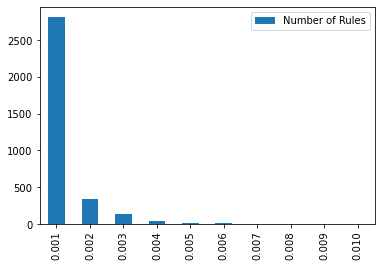

In [9]:
x = []
y = []

for i in np.arange(0.001, 0.01+0.001, 0.001):
    association_rules = apriori(records, min_support=i, min_confidence=0.2, min_lift=3)
    association_results = list(association_rules)
    
    x.append("{:.3f}".format(i))
    y.append(countRuleNum(association_results, output=False))
    
df = pd.DataFrame(y,columns=['Number of Rules'], index = x)
df.plot(kind='bar')
plt.show()